In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con=sqlite3.connect(r'C:\\Users\\Abhijeet\\OneDrive\\Documents\\zomato_rawdata.sqlite')

In [4]:
df=pd.read_sql_query('select * from USERS',con)

In [5]:
df.shape

(51717, 18)

In [6]:
df.head(1)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


# data cleaning

In [7]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.dtypes

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object



int64 sinnged means it will take 64bit (8 bytes) of storage to store the value. ranges from 2^(n-1) -1 to 2^(n-1).
similary we have int32,int16, int8 .. which will differ in sizes and range values.



In [9]:
df['approx_cost(for two people)'].unique()
#this is a type of object , we need to convert this to Integer. also we can replace the comma we dont want that.

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [10]:
df['approx_cost(for two people)'].str.replace(',','')

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [11]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')

In [12]:
df['approx_cost(for two people)'].unique() 


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', None, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [13]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [14]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [15]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df['rate']=df['rate'].str.replace('/5' , '')

In [17]:
df.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       None, '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [18]:
df.rate=df.rate.astype(str)

In [19]:
df.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'None', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [20]:
df['rate'].replace("NEW",np.nan,inplace=True)
df['rate'].replace("None",np.nan,inplace=True)
df['rate'].replace("-",np.nan,inplace=True)

In [21]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

# Data Analysis

Analyze the most famous dishes of most famous restrauents

most famous restraunts -- are the ones with max number of sales/orders

In [22]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [23]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', None, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
     

In [24]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [25]:
df['rest_type'].isnull().sum()

227

In [26]:
#since count is very less will drop the missing value.

In [27]:
data = df.dropna(subset=['rest_type'])

In [28]:
data.shape

(51490, 18)

In [29]:
data_qb=data[data['rest_type'].str.contains('Quick Bites')]

In [30]:
data_qb.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600.0,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari


In [31]:
all_dishes = data_qb['dish_liked'].str.lower().str.cat()

In [32]:
import wordcloud

In [33]:
from wordcloud import WordCloud

In [34]:
wc=WordCloud().generate(all_dishes)

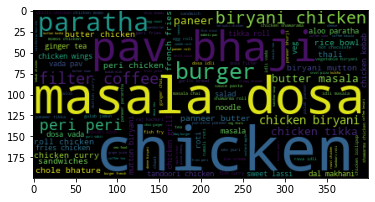

In [35]:
plt.imshow(wc)

Handling the missing values.

In [36]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [37]:
df[['rate', 'reviews_list']]

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,NaN,[]
51714,NaN,[]
51715,4.3,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [38]:
df[df['rate'].isnull()].index

Int64Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,
              114,
            ...
            51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713,
            51714],
           dtype='int64', length=10052)

In [39]:
df['rate'][72]

nan

In [40]:
df['reviews_list'][72]

"[('Rated 4.0', 'RATED\\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'), ('Rated 5.0', 'RATED\\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]"

In [41]:
type(df['reviews_list'][72])

str

will try to capture the rate from this feature and can fill our rate.
first will convert that to list.. for that will use ast module

In [42]:
import ast

In [43]:
ast.literal_eval(df['reviews_list'][72])

[('Rated 4.0',
  'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'),
 ('Rated 5.0',
  'RATED\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]

In [44]:
first_input = ast.literal_eval(df['reviews_list'][72])[0]

In [45]:
[i.replace('Rated' , '') for i in first_input]
#list compression
#but in the output we have single spaces for that we can use the strip function

[' 4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served']

In [46]:
[i.replace('Rated' , '').strip() for i in first_input] #using the strip function we removde the extra spaces.

['4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served']

In [47]:
[i.replace('Rated' , '').strip() for i in first_input][0]
# if you see output it is a type of str. so will convert it to Float

'4.0'

In [48]:
float([i.replace('Rated' , '').strip() for i in first_input][0])


4.0

In [49]:
#so now we have apply this code to all the rows of the review list columns 
#so will write a function.

In [50]:
def get_Rate(x):
    list_of_reviews = ast.literal_eval(x)
    
    if list_of_reviews is None or len(list_of_reviews)<=1:
        return None
    else:
        first_input = list_of_reviews[0]
        rate = float([i.replace('Rated' , '').strip() for i in first_input][0])
        return rate

In [51]:
df['reviews_list'].apply(get_Rate)

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: reviews_list, Length: 51717, dtype: float64

-- fill the Missing values.

In [52]:
df['rate_from_reviews_list']=df['reviews_list'].apply(get_Rate)

In [53]:
df['rate_from_reviews_list'][72]

4.0

In [54]:
df['rate'][72]

nan

In [55]:
df['rate'][72] = df['rate_from_reviews_list'][72]

C:\Users\Abhijeet\AppData\Local\Temp/ipykernel_28696/3757822831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'][72] = df['rate_from_reviews_list'][72]


In [56]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [57]:
nan_index = df[df['rate'].isnull()].index

In [58]:
for index in nan_index:
    df['rate'][index] = df['rate_from_reviews_list'][index]

In [59]:
df.rate.isnull().sum()
#earlier it is more than 10K.

8542

In [60]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rate_from_reviews_list'],
      dtype='object')

In [61]:
dataframe = df.drop(['rate_from_reviews_list' , 'dish_liked'],axis=1)

In [62]:
dataframe.shape

(51717, 17)

In [63]:
# Feature engg

# will do feature extraction
# will add some of the feature.


In [64]:
dataframe.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [65]:
len(dataframe['cuisines'][0].split(','))

3

In [66]:
def count(row):
    return len(row.split(','))

In [67]:
dataframe['total_cuisines'] = dataframe['cuisines'].astype(str).apply(count)
dataframe['multiple_types'] = dataframe['rest_type'].astype(str).apply(count)

In [68]:
threshold = 3.80
dataframe['target'] = dataframe['rate'].astype(float).apply(lambda x :1 if x>=threshold else 0)

In [69]:
#feature importance
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

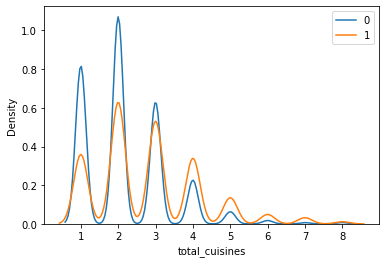

In [70]:
sns.distplot(dataframe[dataframe['target'] == 0]['total_cuisines'],hist=False ,label ='0')
sns.distplot(dataframe[dataframe['target'] == 1]['total_cuisines'],hist=False ,label ='1')
plt.legend()

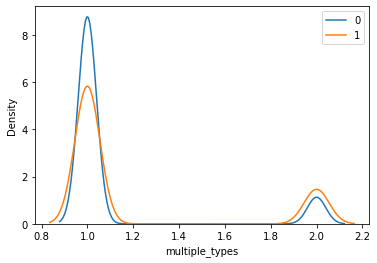

In [71]:
sns.distplot(dataframe[dataframe['target'] == 0]['multiple_types'],hist=False ,label ='0')
sns.distplot(dataframe[dataframe['target'] == 1]['multiple_types'],hist=False ,label ='1')
plt.legend()
# this feature is not good in pridicting

In [72]:
# similary we can check for other feature as well.

In [73]:
# how to select best feature encoding technique.

In [74]:
dataframe.shape

(51717, 20)

In [75]:
dataframe = dataframe.dropna()

In [76]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

In [77]:
imp_feature = ['online_order', 'book_table',
       'votes',  'location', 'rest_type', 
       'approx_cost(for two people)', 
       'listed_in(type)', 'listed_in(city)', 'target']

In [78]:
data = dataframe[imp_feature]

In [79]:
data.shape

(42144, 9)

In [80]:
cat_featues = [col for col in data.columns if data[col].dtypes == "O"]

In [81]:
num_featues = [col for col in data.columns if data[col].dtypes != "O"]

In [82]:
# now will try to perform one hot encoding
# for this will check the number of unqiques values in cat feature

In [83]:
for col in cat_featues:
    print('{} has total {} unique feature '.format(col,data[col].nunique()))

online_order has total 2 unique feature 
book_table has total 2 unique feature 
location has total 92 unique feature 
rest_type has total 87 unique feature 
listed_in(type) has total 7 unique feature 
listed_in(city) has total 30 unique feature 


In [84]:
#top5 /top 10 categories hold 70- 90 % of data then we can use the One Hot Encoding.

In [85]:
freq_cat = ((data['rest_type'].value_counts()[0:5])/len(data))*100

In [86]:
freq_cat

Quick Bites       33.857726
Casual Dining     23.156321
Cafe               7.984529
Dessert Parlor     4.477506
Delivery           4.057517
Name: rest_type, dtype: float64

In [89]:
data[data['rest_type'].isin(freq_cat.index)]

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
5,Yes,No,286,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...
51632,No,No,4,KR Puram,Quick Bites,350.0,Dine-out,Whitefield,0
51634,No,No,34,Brookefield,Quick Bites,200.0,Dine-out,Whitefield,0
51635,No,No,7,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0
51640,No,No,31,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0


In [90]:
#data['rest_type'].apply(lambda x : 'other' if x not in freq_cat.index else x)  
data['rest_type'] = data['rest_type'].apply(lambda x : 'other' if x not in freq_cat.index else x)

In [88]:
data['listed_in(city)'].value_counts()/len(data)*100

BTM                      6.304575
Koramangala 7th Block    5.682897
Koramangala 5th Block    5.464598
Koramangala 4th Block    5.455106
Koramangala 6th Block    5.108675
Jayanagar                4.683941
JP Nagar                 4.002942
Indiranagar              3.734814
Church Street            3.673121
MG Road                  3.644647
Brigade Road             3.571090
Lavelle Road             3.485668
HSR                      3.246014
Residency Road           3.219913
Marathahalli             3.113136
Bannerghatta Road        2.987377
Whitefield               2.920938
Old Airport Road         2.821279
Brookefield              2.783314
Basavanagudi             2.565015
Kammanahalli             2.484339
Sarjapur Road            2.446374
Kalyan Nagar             2.432137
Bellandur                2.337225
Frazer Town              2.318242
Malleshwaram             2.242312
Electronic City          2.080961
Rajajinagar              2.078588
Banashankari             1.744021
New BEL Road  

In [91]:
data['location'].value_counts()/len(data)*100

BTM                      9.586181
Koramangala 5th Block    5.457479
HSR                      4.857156
Indiranagar              4.325645
JP Nagar                 4.235478
                           ...   
Yelahanka                0.009491
West Bangalore           0.009491
Rajarajeshwari Nagar     0.004746
Nagarbhavi               0.002373
Peenya                   0.002373
Name: location, Length: 92, dtype: float64

In [92]:
pd.get_dummies(data['online_order'],prefix='online_order')
# will apply same technique to other columns as well.

,online_order_No,online_order_Yes
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
51709,1,0
51711,1,0
51712,1,0
51715,1,0


In [94]:
data.shape

(42144, 9)

In [95]:
data_backup = data

In [96]:
for col in ['online_order', 'book_table', 'rest_type', 'listed_in(type)']:
    col_encoded = pd.get_dummies(data[col] , prefix=col , drop_first=True)
    data = pd.concat([data , col_encoded] , axis=1)

In [97]:
data.head(5)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,918,Banashankari,other,800.0,Buffet,Banashankari,1,1,...,0,0,0,1,0,0,0,0,0,0
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,0,...,0,0,1,0,0,0,0,0,0,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# mean data encoding 

In [99]:
data[['location','listed_in(city)']].head(3)
# this type of data we can not give to machine learning models.
# will try to find the average success percent of that location.

,location,listed_in(city)
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari


In [102]:
data.groupby(['location'])['target'].mean()

location
BTM                  0.329703
Banashankari         0.477124
Banaswadi            0.259494
Bannerghatta Road    0.305071
Basavanagudi         0.523333
                       ...   
West Bangalore       0.250000
Whitefield           0.404599
Wilson Garden        0.286458
Yelahanka            0.500000
Yeshwantpur          0.223214
Name: target, Length: 92, dtype: float64

In [103]:
dict_mean_location = data.groupby(['location'])['target'].mean().to_dict()


In [104]:
dict_mean_location

{'BTM': 0.3297029702970297,
 'Banashankari': 0.477124183006536,
 'Banaswadi': 0.25949367088607594,
 'Bannerghatta Road': 0.3050713153724247,
 'Basavanagudi': 0.5233333333333333,
 'Basaveshwara Nagar': 0.43283582089552236,
 'Bellandur': 0.32976653696498054,
 'Bommanahalli': 0.07534246575342465,
 'Brigade Road': 0.5205855443732845,
 'Brookefield': 0.4028776978417266,
 'CV Raman Nagar': 0.12903225806451613,
 'Central Bangalore': 0.0,
 'Church Street': 0.8099630996309963,
 'City Market': 0.2727272727272727,
 'Commercial Street': 0.4290322580645161,
 'Cunningham Road': 0.6948051948051948,
 'Domlur': 0.3581730769230769,
 'East Bangalore': 0.16666666666666666,
 'Ejipura': 0.13409961685823754,
 'Electronic City': 0.2615039281705948,
 'Frazer Town': 0.4098939929328622,
 'HBR Layout': 0.5825242718446602,
 'HSR': 0.4899853444064485,
 'Hebbal': 0.5,
 'Hennur': 0.1896551724137931,
 'Hosur Road': 0.5138888888888888,
 'ITPL Main Road, Whitefield': 0.32967032967032966,
 'Indiranagar': 0.66319253976961

In [105]:
data['location'] = data['location'].map(dict_mean_location)

In [113]:
dict_mean_city = data.groupby(['listed_in(city)'])['target'].mean().to_dict()

In [114]:
data['listed_in(city)'] = data['listed_in(city)'].map(dict_mean_location)

In [116]:
data['listed_in(city)']

0        0.477124
1        0.477124
2        0.477124
3        0.477124
4        0.477124
           ...   
51709    0.404599
51711    0.404599
51712    0.404599
51715    0.404599
51716    0.404599
Name: listed_in(city), Length: 42144, dtype: float64

In [118]:
data.columns

Index(['votes', 'location', 'approx_cost(for two people)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

In [120]:
data.drop(['online_order', 'book_table' , 'rest_type' , 'listed_in(type)'] , axis=1 , inplace=True)

##  drop these features as we have already encoded it 

In [121]:
data.votes

0        775
1        787
2        918
3         88
4        166
        ... 
51709     34
51711     81
51712     27
51715    236
51716     13
Name: votes, Length: 42144, dtype: int64

In [122]:
data.head(2)

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,775,0.477124,800.0,0.477124,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,787,0.477124,800.0,0.477124,1,1,0,1,0,0,0,0,0,0,0,0,0,0


In [123]:
# detecting the outliers
# data visualization 
from scipy import stats

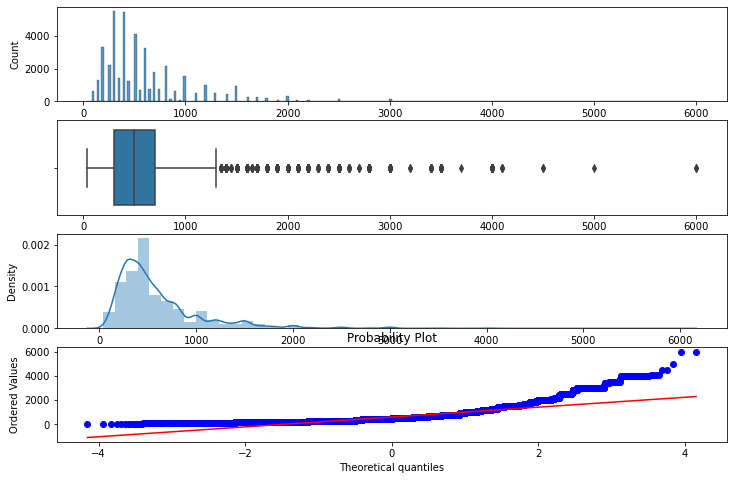

In [124]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])

plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'],plot=plt)

plt.show()


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

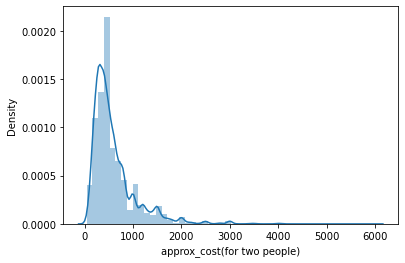

In [127]:
sns.distplot(data['approx_cost(for two people)'])

In [128]:
# will apply the log to this feature and once we do that we get close to noraml distribution
# log1p = log(1+x) -- we are doing this becoz if any of the value of x is zero, log 0 is not defined
# log1p performed well.

np.log1p(data['approx_cost(for two people)'])

0        6.685861
1        6.685861
2        6.685861
3        5.707110
4        6.398595
           ...   
51709    6.685861
51711    6.685861
51712    7.313887
51715    7.824446
51716    7.313887
Name: approx_cost(for two people), Length: 42144, dtype: float64

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

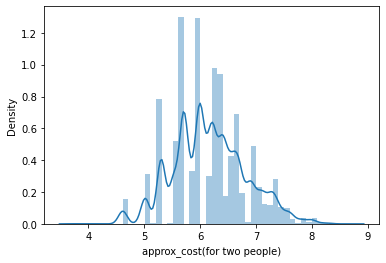

In [129]:
sns.distplot(np.log1p(data['approx_cost(for two people)']))
# this distribution is approximatly equal to normal.

In [130]:
data['approx_cost(for two people)'] = np.log1p(data['approx_cost(for two people)'])
# now if we plot it again, then will end up getting close normal.

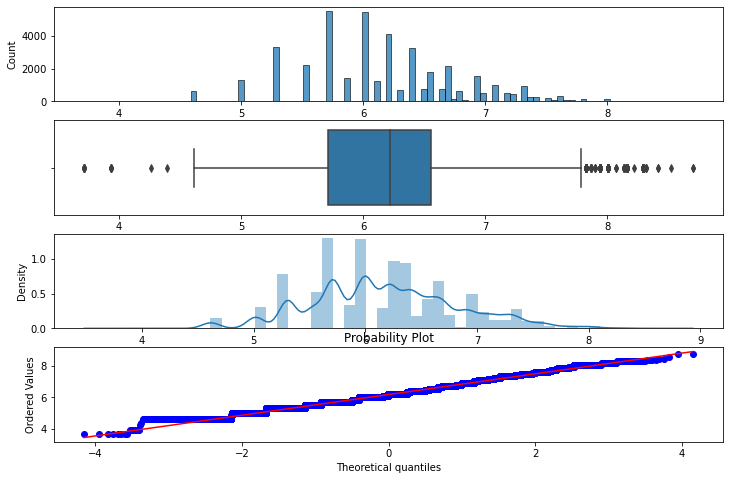

In [131]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])

plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'],plot=plt)

plt.show()


In [132]:
# the moment we see the skewness in the graph it is good to apply log_ transformation.

In [133]:
data['votes'] = np.log1p(data['votes'])
# now if we plot it again, then will end up getting close normal.

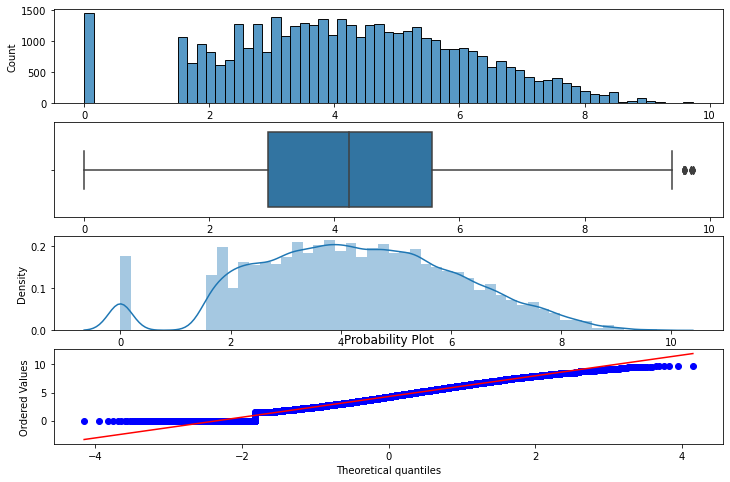

In [134]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])

plt.subplot(414)
stats.probplot(data['votes'],plot=plt)

plt.show()


In [135]:
data.dtypes

votes                                 float64
location                              float64
approx_cost(for two people)           float64
listed_in(city)                       float64
target                                  int64
online_order_Yes                        uint8
book_table_Yes                          uint8
rest_type_Casual Dining                 uint8
rest_type_Delivery                      uint8
rest_type_Dessert Parlor                uint8
rest_type_Quick Bites                   uint8
rest_type_other                         uint8
listed_in(type)_Cafes                   uint8
listed_in(type)_Delivery                uint8
listed_in(type)_Desserts                uint8
listed_in(type)_Dine-out                uint8
listed_in(type)_Drinks & nightlife      uint8
listed_in(type)_Pubs and bars           uint8
dtype: object

In [138]:
data_backup1=data

# model buidling


In [139]:
y=data['target']

In [140]:
X=data.drop('target',axis=1)

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train ,X_test, y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [143]:
X_train.columns

Index(['votes', 'location', 'approx_cost(for two people)', 'listed_in(city)',
       'online_order_Yes', 'book_table_Yes', 'rest_type_Casual Dining',
       'rest_type_Delivery', 'rest_type_Dessert Parlor',
       'rest_type_Quick Bites', 'rest_type_other', 'listed_in(type)_Cafes',
       'listed_in(type)_Delivery', 'listed_in(type)_Desserts',
       'listed_in(type)_Dine-out', 'listed_in(type)_Drinks & nightlife',
       'listed_in(type)_Pubs and bars'],
      dtype='object')

In [144]:
data.shape

(42144, 18)

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf_model = RandomForestClassifier()

In [147]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [148]:
predictions = rf_model.predict(X_test)

In [149]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [150]:
accuracy_score(predictions,y_test)

0.8987633016968651

In [151]:
confusion_matrix(predictions,y_test)

array([[6421,  727],
       [ 681, 6079]], dtype=int64)

# model hypertuning 

In [152]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100 , 1200 , num=3)] 

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5 ,30 , num=3)]

# Minimum number of samples required to split a node
min_samples_split= [5 , 10 , 100]

In [153]:
random_grid = {
    'n_estimators':n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [154]:
random_grid

{'n_estimators': [100, 650, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 17, 30],
 'min_samples_split': [5, 10, 100]}

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [156]:
estimator = RandomForestClassifier() ### initialise estimator

In [157]:
rf_random = RandomizedSearchCV(estimator = estimator , param_distributions= random_grid , cv=2 , verbose=2 , n_jobs=-1)

In [158]:
rf_random.fit(X_train , y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 17, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 100],
                                        'n_estimators': [100, 650, 1200]},
                   verbose=2)

In [159]:
rf_random.best_params_ ## getting best values of parameters

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [160]:
rf_random.best_estimator_ ## getting best model(ie optimised model)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1200)

In [161]:
rf_opt = RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=650)

In [162]:
rf_opt.fit(X_train , y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=650)

In [163]:
predictions_opt = rf_opt.predict(X_test)

In [164]:
accuracy_score(predictions_opt , y_test)

0.8943054357204486